Quesion1: add more dense layers to the existing code and check how the accuracy changes 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Activation, Dense


In [2]:
dataset = pd.read_csv('/content/diabetes.csv',header=None).values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset[:,0:8], dataset[:,8],test_size=0.25, random_state=87)

X_train.shape, y_train.shape

((576, 8), (576,))

In [4]:
my_first_nn = Sequential() #sequential model created
my_first_nn.add(Dense(20, input_dim=8, activation='relu')) #added hidden layer
my_first_nn.add(Dense(1, activation='sigmoid')) #output layer


my_first_nn.compile(loss='binary_crossentropy', optimizer='adam')
my_first_nn_fitted = my_first_nn.fit(X_train, y_train, epochs=100, verbose=0,initial_epoch=0)
print(my_first_nn.summary())
print(round(my_first_nn.evaluate(X_test,y_test,verbose=0),3))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________
None
0.598


Adding more dense layers and the accuracy compared

In [5]:
my_first_nn_2 = Sequential() #sequential model created
my_first_nn_2.add(Dense(20, input_dim=8, activation='relu')) #added hidden layer
my_first_nn_2.add(Dense(40, activation='sigmoid')) #added hidden layer
my_first_nn_2.add(Dense(60, activation='sigmoid')) #added hidden layer
my_first_nn_2.add(Dense(1, activation='sigmoid')) #added hidden layer



my_first_nn_2.compile(loss='binary_crossentropy', optimizer='adam')
my_first_nn_fitted_2 = my_first_nn.fit(X_train, y_train, epochs=100, verbose=0,initial_epoch=0)
print(my_first_nn_2.summary())
print(round(my_first_nn_2.evaluate(X_test,y_test,verbose=0),3))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_3 (Dense)              (None, 40)                840       
_________________________________________________________________
dense_4 (Dense)              (None, 60)                2460      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 61        
Total params: 3,541
Trainable params: 3,541
Non-trainable params: 0
_________________________________________________________________
None
0.669


plotting both models 

In [6]:
print(my_first_nn_fitted.history.keys(),'\n')
print(my_first_nn_fitted_2.history.keys())

dict_keys(['loss']) 

dict_keys(['loss'])


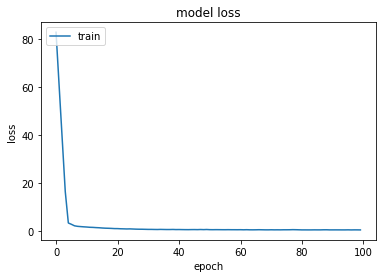

In [7]:
# summarize history for loss
plt.plot(my_first_nn_fitted.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

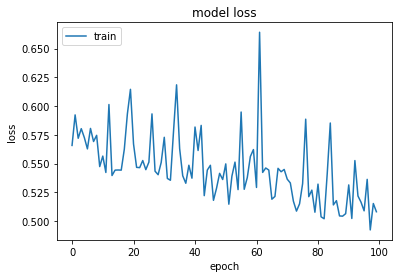

In [8]:
# summarize history for loss
plt.plot(my_first_nn_fitted_2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()